In [13]:
import pickle
import pandas as pd
import numpy
import re
import os
import numpy as np
import gensim
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from gensim.models import Doc2Vec

In [95]:
train= pd.read_csv('train.csv',usecols=['text'])

In [96]:
train

,text
0,1 3 Delhi New Delhi Bombing/Explosion Pri...
1,1 5 Jammu and Kashmir Barshala Armed Assau...
2,1 20 Bihar Gaya Armed Assault Police Pol...
3,1 21 Jammu and Kashmir Desapani Armed Assa...
4,1 24 Jammu and Kashmir Srinagar Assassinat...
5,1 26 Rajasthan Jaipur Bombing/Explosion G...
6,1 26 Jammu and Kashmir Srinagar Bombing/Ex...
7,1 26 Manipur Imphal Bombing/Explosion Mil...
8,1 26 Jammu and Kashmir Srinagar Bombing/Ex...
9,1 30 Karnataka Bangalore Unknown Business...


In [79]:
LabeledSentence1 = gensim.models.doc2vec.TaggedDocument
all_content_train = []
titles=[]
j=0
for em in train['text'].values:
    all_content_train.append(LabeledSentence1(em,[j]))
    titles.append(j)
    j+=1
print("Number of texts processed: ", j)

Number of texts processed:  10


In [97]:
d2v_model = Doc2Vec(all_content_train, size = 100, window = 10, min_count = 5, workers=7, dm = 1,alpha=0.025, min_alpha=0.001)
d2v_model.train(all_content_train, total_examples=d2v_model.corpus_count, epochs=10, start_alpha=0.002, end_alpha=-0.016)

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\gensim\models\doc2vec.py:574: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


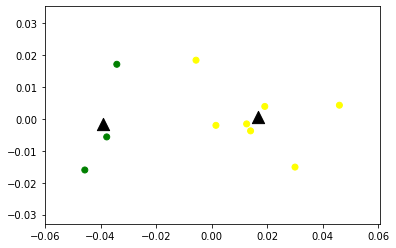

In [98]:
kmeans_model = KMeans(n_clusters=2, init='k-means++', max_iter=100) 
X = kmeans_model.fit(d2v_model.docvecs.vectors_docs )
labels=kmeans_model.labels_.tolist()
l = kmeans_model.fit_predict(d2v_model.docvecs.vectors_docs )
pca = PCA(n_components=2).fit(d2v_model.docvecs.vectors_docs )
datapoint = pca.transform(d2v_model.docvecs.vectors_docs )
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure
label1 = ["#FFFF00", "#008000", "#0000FF", "#800080"]
color = [label1[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)
centroids = kmeans_model.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker="^", s=150, c="#000000")
plt.show()

3


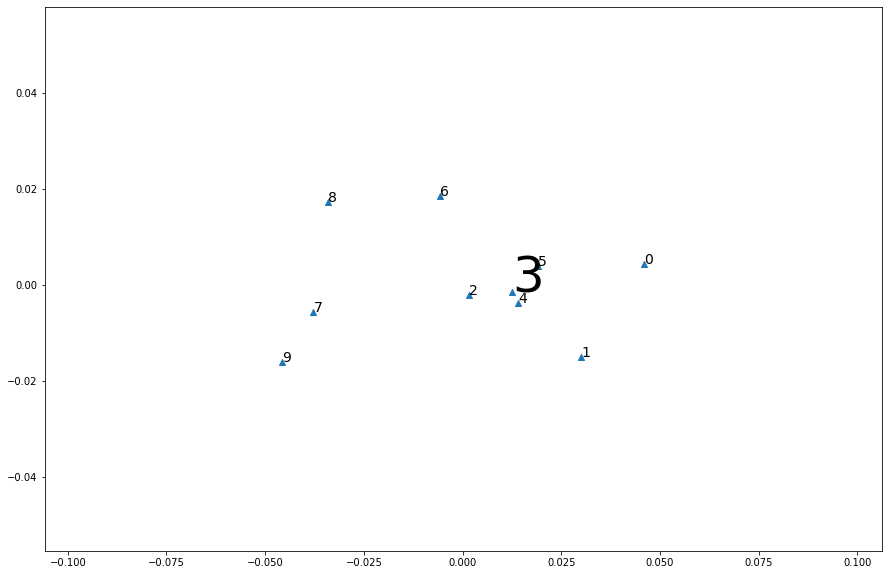

In [100]:
# set up plot
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(figsize=(15, 10)) # set size
ax.margins(0.5)
# ax = Axes3D(fig)

plt.scatter(datapoint[:, 0], datapoint[:, 1],marker="^")
x=datapoint[:, 0]
y=datapoint[:, 1]



# df = pd.DataFrame(dict(x=xs, y=ys, label=cluster, title=titles)) 
for i in range(len(x)):
    if i==149 or i==3:
        ax.text(x[i], y[i] ,titles[i],size=50)
        print(titles[i])
    else:
        ax.text(x[i], y[i] ,titles[i],size=14)  

In [112]:
d2v_model.docvecs.vectors_docs[0]


array([-6.33291900e-03, -3.24351527e-03, -4.69927583e-03,  5.01323491e-03,
       -5.05584618e-03,  1.64694688e-03, -1.17181521e-03, -2.26393878e-03,
       -6.67281915e-03,  5.34667459e-04,  1.30868598e-03,  1.92523387e-03,
       -1.97238638e-03, -8.87777936e-03,  2.19816901e-03,  6.17647730e-03,
       -5.65464329e-03,  3.57132126e-03,  2.55775871e-03, -1.89594779e-04,
       -3.18931532e-03,  1.06010875e-02,  3.97043768e-03, -4.97226603e-03,
        1.05370246e-02, -2.45410576e-03, -2.39320783e-04, -1.56765385e-03,
        1.66729162e-03, -9.97102633e-03, -2.09461595e-03, -7.13523244e-03,
        3.96977412e-03,  3.40777752e-03, -1.74056168e-03,  4.28090757e-03,
        8.58324755e-04, -6.64560881e-04,  6.72754133e-04,  5.17947599e-03,
        4.78600338e-03, -3.77055723e-03,  4.14072303e-03, -1.88168872e-03,
        3.46880220e-03, -5.58247091e-03, -1.61059957e-03, -1.81907450e-03,
        1.73781897e-04,  2.63160910e-03,  1.16597675e-02,  2.82486784e-03,
        5.25628496e-03,  

In [102]:
datapoint

array([[ 0.04598729,  0.0043368 ],
       [ 0.03000777, -0.01509147],
       [ 0.0015343 , -0.00198917],
       [ 0.0125853 , -0.00153276],
       [ 0.01400942, -0.00372229],
       [ 0.0191274 ,  0.00395685],
       [-0.00563338,  0.01847715],
       [-0.03778777, -0.00561859],
       [-0.03415322,  0.01718687],
       [-0.04567711, -0.01600337]], dtype=float32)

In [36]:
l

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0])

In [103]:
datapoint[0][1]


0.0043367995

In [105]:
dist=[]
for i in range(len(datapoint)-1):
    dist.append(numpy.linalg.norm(datapoint[3]-datapoint[i+1]))

In [106]:
max(dist)

0.060032554

In [107]:
dist

[0.022076707,
 0.011060422,
 0.0,
 0.0026119223,
 0.008540189,
 0.027061358,
 0.050538503,
 0.050347928,
 0.060032554]